Accuracy: 0.7761194029850746

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



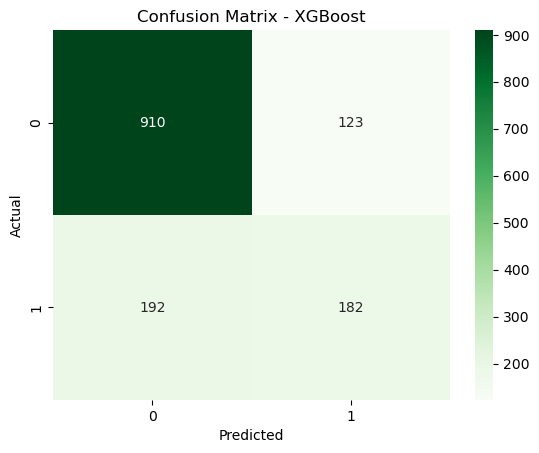

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ABHISHEKDARSANH/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


df.drop('customerID', axis=1, inplace=True)

df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
